# Preprocessing data with pandas

**Names**

Cristina Mora Velasco
___________________________________

Francisco Miguel Galvan Muñoz
___________________________________

## Pandas

Python Data Analysis Library) an open source (BSD) library designed to process data with high performance.
Some definitions:

- **Dataframe**: the main structure of Pandas. Is similat to a database table or a excell leaf.
- **CSV**: Is the most commonly used dataset format in machine learning. It is a text file with training each one stored on one line

Load datase

but it gives us an error because 3.77 is not convertible to float, we have to change the character to a dot.

In [7]:
gameSales["JP_Sales"] = gameSales["JP_Sales"].apply(lambda x:  str(x).replace(",","."))

NameError: name 'gameSales' is not defined

now we are left with only the overall sales column

In [ ]:
mostPlatformGame[mostPlatformGame["Global_Sales"] == mostPlatformGame["Global_Sales"].max()]

Now let's see which first party game is the best seller on each platform.

We have to make a merge of both tables in order to know which platforms belong to which brand of consoles.

In [ ]:
gameSalesMerge = pd.merge(gameSales,firstParty,how='outer',on=('Platform'), indicator=True)
display(gameSalesMerge)

Now we group by first_Party and keep the one with the largest sales.

**Answer in the gape  below**

In [ ]:
# Exercise 2

In [13]:
import numpy as np
import pandas as pd


def cleanData(data):
    
    data["score"] = pd.to_numeric(data["score"], errors='coerce')
    data["user score"] = pd.to_numeric(data["user score"], errors='coerce')
    data["score"] = data["score"].astype(np.float64)
    data["user score"] = data["user score"].astype(np.float64)
    data["score"] = data["score"] / 10
    data["critics"] = pd.to_numeric(data["critics"], errors='coerce')
    data["users"] = pd.to_numeric(data["users"], errors='coerce')
    data["critics"] = data["critics"].astype(np.float64)
    data["users"] = data["users"].astype(np.float64)
    data = data.dropna(subset=["score", "user score", "critics","users"])
    return data

def load_data_csv(path,x_colum,y_colum):
    data = pd.read_csv(path)
    data = cleanData(data)
    X = data[x_colum].to_numpy()
    y = data[y_colum].to_numpy()
    return X, y

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def load_data_csv_multi(path,x1_colum,x2_colum,x3_colum,y_colum):
    data = pd.read_csv(path)
    data = cleanData(data)
    x1 = data[x1_colum].to_numpy()
    x2 = data[x2_colum].to_numpy()
    x3 = data[x3_colum].to_numpy()
    X = np.array([x1, x2, x3])
    X = X.T
    y = data[y_colum].to_numpy()
    return X, y



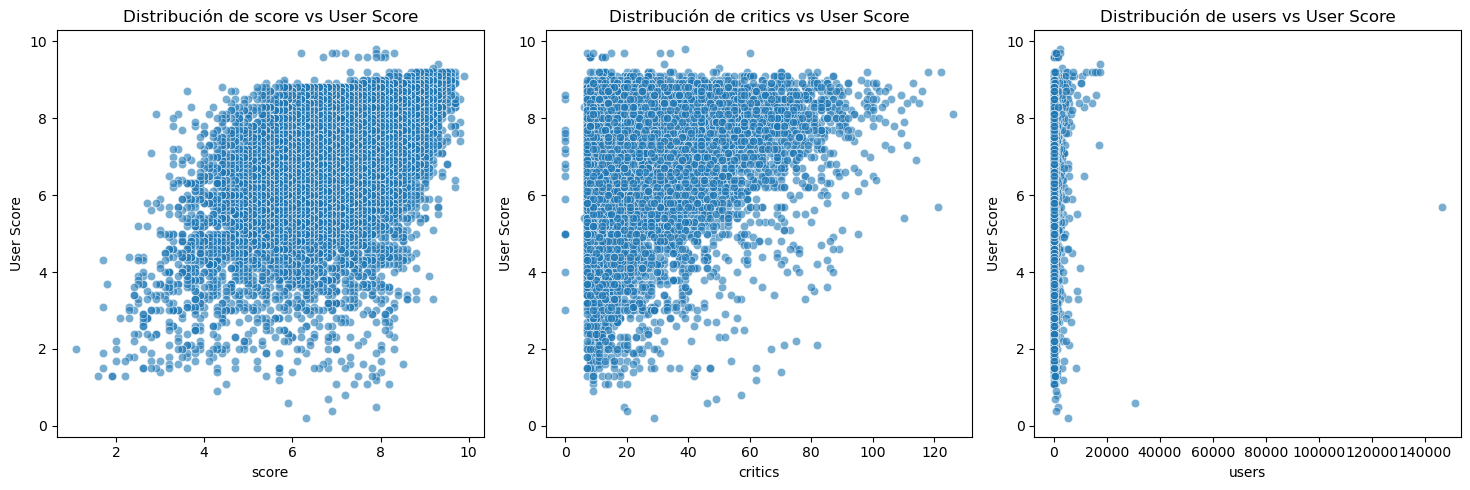

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_data_csv, zscore_normalize_features

# Cargar los datos
path = 'data/games-data.csv'
x_columns = ['score', 'critics', 'users']
y_column = 'user score'
X, y = load_data_csv(path, x_columns, y_column)

# Normalizar los datos
X_norm, mu, sigma = zscore_normalize_features(X)

# Visualizar la distribución
plt.figure(figsize=(15, 5))

for i, col in enumerate(x_columns):
    plt.subplot(1, len(x_columns), i + 1)
    sns.scatterplot(x=X[:, i], y=y, alpha=0.6)
    plt.title(f'Distribución de {col} vs User Score')
    plt.xlabel(col)
    plt.ylabel('User Score')

plt.tight_layout()
plt.show()

In [ ]:
import practica01 as pt
import public_tests
import time



